# Metody Inteligencji Obliczeniowej w Analizie Danych

[Tasks](https://pages.mini.pw.edu.pl/~karwowskij/mioad/lab-sieci.html)

### Lab 5: NN4: Rozwiązywanie zadania klasyfikacji (1 tydzień, 2 punkty)

Zaimplementować funkcję softmax dla warstwy wyjściowej sieci neuronowej. Sprawdzić szybkość i
skuteczność w wariancie, gdy sieć używa funkcji softmax na ostatniej warstwie i gdy jest użyta zwykła
funkcja aktywacji. 

**Softmax wymaga też odpowiednich zmian w algorytmie uczenia, uwzględniających
pochodną fukcji.**

Przeprowadzić eksperymenty na zbiorach (w nawiasach wymagana wartość F-measure na 2 punkty):
- rings3-regular (F-measure: 0.75),
- easy (F-measure: 0.99),
- xor3 (F-measure: 0.97).

#### TODO:

- implement softmax with derivative
- compare training speed and accuracy with and without softmax at the last layer


In [1]:
import MultiLayerPerceptron as mlp
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def plot_good_vs_bad_predictions(network, x_test, y_test):
    pred_class = np.argmax(network.predict(x_test), axis=1)
    real_class = np.array(y_test).argmax(axis=1)
    is_good_prediction = real_class == pred_class
    
    fig, (axes_1, axes_2, axes_3) = plt.subplots(1, 3,figsize=(12, 4))
    sns.scatterplot(x=np.array(x_test)[:,0], y=np.array(x_test)[:,1], hue=real_class, ax=axes_1)
    axes_1.set_title("Real classes")
    sns.scatterplot(x=np.array(x_test)[:,0], y=np.array(x_test)[:,1], hue=pred_class, ax=axes_2)
    axes_2.set_title("Predicted classes")
    sns.scatterplot(x=np.array(x_test)[:,0], y=np.array(x_test)[:,1], hue=is_good_prediction, ax=axes_3)
    axes_3.set_title("Good vs Bad Predictions")
    plt.show()

## Dataset 1: rings3-regular

In [3]:
df_train = pd.read_csv('data/classification/rings3-regular-training.csv').sample(frac=1)
df_test = pd.read_csv('data/classification/rings3-regular-test.csv').sample(frac=1)
print(df_test.head())

# onehot encoding
x_train = df_train.loc[:,df_train.columns!='c'].to_numpy().tolist()
y_train = pd.get_dummies(df_train.loc[:,df_train.columns=='c'].squeeze(axis=1), prefix='class').to_numpy().tolist()
x_test = df_test.loc[:,df_test.columns!='c'].to_numpy().tolist()
y_test = pd.get_dummies(df_test.loc[:,df_test.columns=='c'].squeeze(axis=1), prefix='class').to_numpy().tolist()

print(f"\nUnique classes: {np.unique(y_train)}")

              x          y  c
1837 -82.137248  53.001963  2
478   84.805496  59.093130  2
419   95.088028  30.486269  1
1572  87.803970  90.020491  2
1524  75.991172  59.056692  1

Unique classes: [0 1]


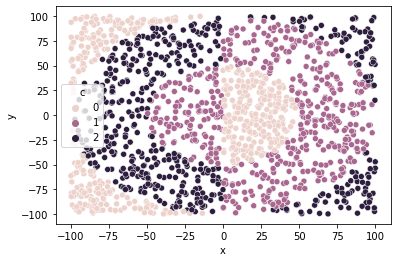

In [4]:
sns.scatterplot(data=df_train, x='x', y='y', hue='c');

#### Model 1 - without softmax

In [9]:
net1_1 = mlp.NeuralNetwork()
net1_1.add(mlp.Layer(2))
net1_1.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net1_1.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net1_1.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net1_1.add(mlp.Layer(3, activation_fun=mlp.ActivationTanh(), add_bias=False))

In [10]:
net1_1.train(x_train, y_train, x_test, y_test, epochs=500, learning_rate=0.01, batch_size=10)

Epoch:    1/500,  MSE loss train:    0.625,  test:    0.648
Epoch:   51/500,  MSE loss train:     0.12,  test:    0.131
Epoch:  101/500,  MSE loss train:    0.086,  test:    0.091
Epoch:  151/500,  MSE loss train:    0.064,  test:     0.07
Epoch:  201/500,  MSE loss train:    0.057,  test:    0.063
Epoch:  251/500,  MSE loss train:    0.053,  test:     0.06
Epoch:  301/500,  MSE loss train:    0.051,  test:    0.059
Epoch:  351/500,  MSE loss train:    0.051,  test:    0.058
Epoch:  401/500,  MSE loss train:    0.049,  test:    0.057
Epoch:  451/500,  MSE loss train:    0.049,  test:    0.056
Epoch:  500/500,  MSE loss train:    0.047,  test:    0.054


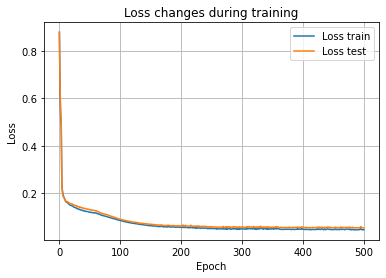

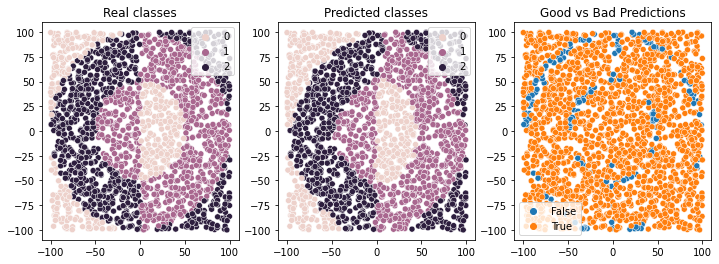

In [11]:
net1_1.plot_training_history()
plot_good_vs_bad_predictions(net1_1, x_test, y_test)

#### Model 2 - with softmax

In [12]:
net1_2 = mlp.NeuralNetwork()
net1_2.add(mlp.Layer(2))
net1_2.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net1_2.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net1_2.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net1_2.add(mlp.Layer(3, activation_fun=mlp.ActivationSoftmax(), add_bias=False))

In [13]:
net1_2.train(x_train, y_train, x_test, y_test, epochs=500, learning_rate=0.01,\
            batch_size=10, loss_function=mlp.LossCrossEntropy())

c:\Users\matem\PycharmProjects\miowad\MultiLayerPerceptron.py:279: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP/(TP+FP)


Epoch:    1/500,  CrossEntropy loss train:    0.928,  test:    0.907   |   F1 macro train:    0.451,  test:    0.476
Epoch:   51/500,  CrossEntropy loss train:    0.432,  test:    0.444   |   F1 macro train:    0.839,  test:    0.842
Epoch:  101/500,  CrossEntropy loss train:    0.343,  test:    0.357   |   F1 macro train:    0.861,  test:    0.846
Epoch:  151/500,  CrossEntropy loss train:     0.37,  test:    0.363   |   F1 macro train:     0.85,  test:     0.84
Epoch:  201/500,  CrossEntropy loss train:    0.274,  test:     0.29   |   F1 macro train:    0.888,  test:    0.873
Epoch:  251/500,  CrossEntropy loss train:    0.253,  test:     0.28   |   F1 macro train:    0.889,  test:    0.879
Epoch:  301/500,  CrossEntropy loss train:    0.232,  test:    0.256   |   F1 macro train:     0.91,  test:    0.893
Epoch:  351/500,  CrossEntropy loss train:    0.226,  test:     0.25   |   F1 macro train:    0.913,  test:    0.894
Epoch:  401/500,  CrossEntropy loss train:    0.201,  test:    0

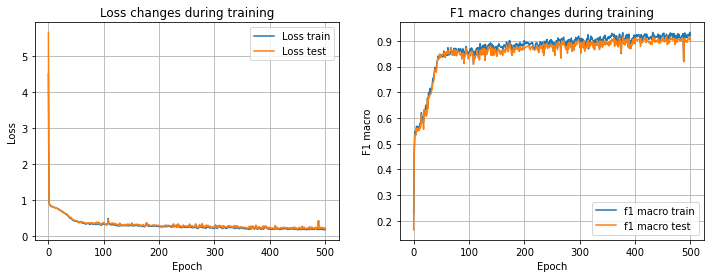

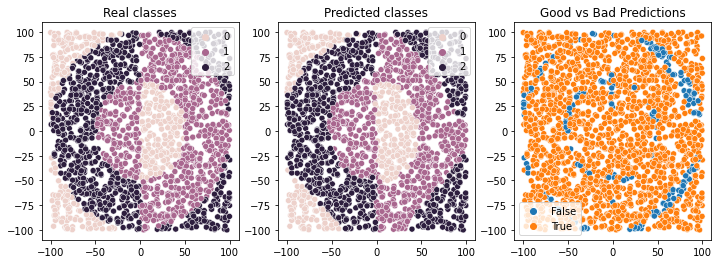

In [14]:
net1_2.plot_training_history()
plot_good_vs_bad_predictions(net1_2, x_test, y_test)

## Dataset 2: easy

In [12]:
df_train = pd.read_csv('data/classification/easy-training.csv')
df_test = pd.read_csv('data/classification/easy-test.csv')
print(df_test.head())

x_train = df_train.loc[:,df_train.columns!='c'].to_numpy().tolist()
y_train = pd.get_dummies(df_train.loc[:,df_train.columns=='c'].squeeze(axis=1), prefix='class').to_numpy().tolist()
x_test = df_train.loc[:,df_train.columns!='c'].to_numpy().tolist()
y_test = pd.get_dummies(df_train.loc[:,df_train.columns=='c'].squeeze(axis=1), prefix='class').to_numpy().tolist()

print(f"\n Unique classes: {np.unique(y_train)}")

           x          y      c
0  88.836312  35.105689   True
1   8.454690  57.210448  False
2 -57.221426  29.312467  False
3 -11.922723 -88.264355   True
4   8.885765   6.605795   True

 Unique classes: [0 1]


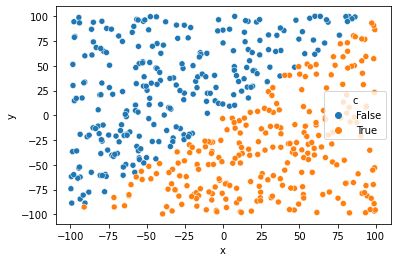

In [13]:
sns.scatterplot(data=df_train, x='x', y='y', hue='c');

#### Model 1 - without softmax

In [18]:
net2_1 = mlp.NeuralNetwork()
net2_1.add(mlp.Layer(2))
net2_1.add(mlp.Layer(5, activation_fun=mlp.ActivationSigmoid()))
net2_1.add(mlp.Layer(5, activation_fun=mlp.ActivationSigmoid()))
net2_1.add(mlp.Layer(2, activation_fun=mlp.ActivationSigmoid(), add_bias=False))

In [19]:
net2_1.train(x_train, y_train, x_test, y_test, epochs=100, learning_rate=0.03, batch_size=5)

Epoch:    1/100,  MSE loss train:    0.257,  test:    0.257
Epoch:   11/100,  MSE loss train:    0.194,  test:    0.194
Epoch:   21/100,  MSE loss train:    0.074,  test:    0.074
Epoch:   31/100,  MSE loss train:    0.033,  test:    0.033
Epoch:   41/100,  MSE loss train:    0.024,  test:    0.024
Epoch:   51/100,  MSE loss train:    0.018,  test:    0.018
Epoch:   61/100,  MSE loss train:    0.016,  test:    0.016
Epoch:   71/100,  MSE loss train:     0.01,  test:     0.01
Epoch:   81/100,  MSE loss train:    0.007,  test:    0.007
Epoch:   91/100,  MSE loss train:    0.009,  test:    0.009
Epoch:  100/100,  MSE loss train:    0.005,  test:    0.005


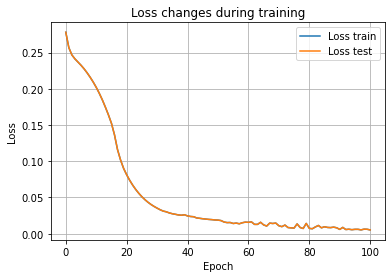

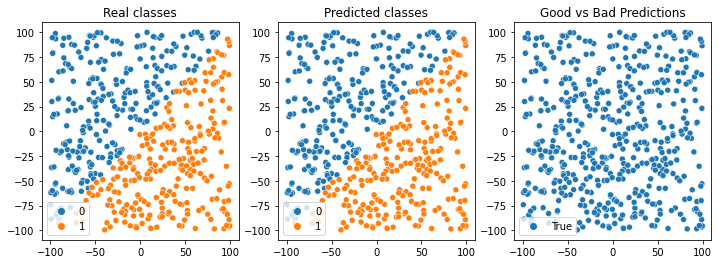

In [20]:
net2_1.plot_training_history()
plot_good_vs_bad_predictions(net2_1, x_test, y_test)

#### Model 2 - with softmax

In [54]:
net2_2 = mlp.NeuralNetwork()
net2_2.add(mlp.Layer(2))
net2_2.add(mlp.Layer(5, activation_fun=mlp.ActivationReLU()))
net2_2.add(mlp.Layer(5, activation_fun=mlp.ActivationReLU()))
net2_2.add(mlp.Layer(2, activation_fun=mlp.ActivationSoftmax(), add_bias=False))

In [55]:
net2_2.train(x_train, y_train, x_test, y_test, epochs=100, learning_rate=0.01, \
            batch_size=5, loss_function=mlp.LossCrossEntropy())

Epoch:    1/100,  CrossEntropy loss train:    0.867,  test:    0.867   |   F1 macro train:    0.724,  test:    0.724
Epoch:   11/100,  CrossEntropy loss train:     0.14,  test:     0.14   |   F1 macro train:     0.95,  test:     0.95
Epoch:   21/100,  CrossEntropy loss train:    0.109,  test:    0.109   |   F1 macro train:    0.958,  test:    0.958
Epoch:   31/100,  CrossEntropy loss train:    0.117,  test:    0.117   |   F1 macro train:     0.96,  test:     0.96
Epoch:   41/100,  CrossEntropy loss train:    0.104,  test:    0.104   |   F1 macro train:     0.97,  test:     0.97
Epoch:   51/100,  CrossEntropy loss train:    0.086,  test:    0.086   |   F1 macro train:    0.968,  test:    0.968
Epoch:   61/100,  CrossEntropy loss train:    0.061,  test:    0.061   |   F1 macro train:    0.972,  test:    0.972
Epoch:   71/100,  CrossEntropy loss train:    0.055,  test:    0.055   |   F1 macro train:    0.972,  test:    0.972
Epoch:   81/100,  CrossEntropy loss train:    0.065,  test:    0

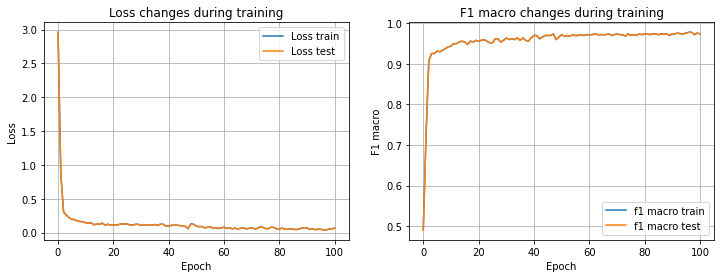

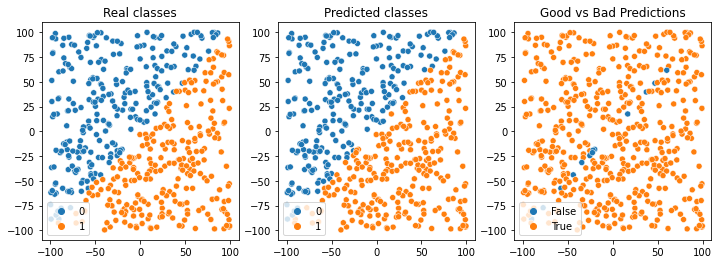

In [56]:
net2_2.plot_training_history()
plot_good_vs_bad_predictions(net2_2, x_test, y_test)

## Dataset 3: xor3

In [57]:
df_train = pd.read_csv('data/classification/xor3-training.csv')
df_test = pd.read_csv('data/classification/xor3-test.csv')
print(df_test.head())

x_train = df_train.loc[:,df_train.columns!='c'].to_numpy().tolist()
y_train = pd.get_dummies(df_train.loc[:,df_train.columns=='c'].squeeze(axis=1), prefix='class').to_numpy().tolist()
x_test = df_train.loc[:,df_train.columns!='c'].to_numpy().tolist()
y_test = pd.get_dummies(df_train.loc[:,df_train.columns=='c'].squeeze(axis=1), prefix='class').to_numpy().tolist()

print(f"\nUnique classes: {np.unique(y_train)}")

           x          y  c
0  36.973203 -55.586985  0
1  39.495972  78.216447  0
2  78.443533  77.156005  0
3   9.559384  -6.161679  0
4  42.216651  48.249953  0

Unique classes: [0 1]


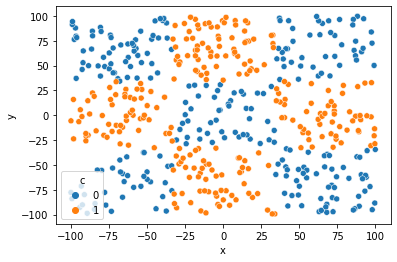

In [58]:
import seaborn as sns
sns.scatterplot(data=df_train, x='x', y='y', hue='c');

#### Model 1 - without softmax

In [59]:
net3_1 = mlp.NeuralNetwork()
net3_1.add(mlp.Layer(2))
net3_1.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net3_1.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net3_1.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net3_1.add(mlp.Layer(2, activation_fun=mlp.ActivationTanh(), add_bias=False))

In [60]:
net3_1.train(x_train, y_train, x_test, y_test, epochs=500, learning_rate=0.01, batch_size=10)

Epoch:    1/500,  MSE loss train:    0.478,  test:    0.478
Epoch:   51/500,  MSE loss train:    0.378,  test:    0.378
Epoch:  101/500,  MSE loss train:    0.184,  test:    0.184
Epoch:  151/500,  MSE loss train:     0.17,  test:     0.17
Epoch:  201/500,  MSE loss train:    0.165,  test:    0.165
Epoch:  251/500,  MSE loss train:    0.162,  test:    0.162
Epoch:  301/500,  MSE loss train:    0.158,  test:    0.158
Epoch:  351/500,  MSE loss train:     0.14,  test:     0.14
Epoch:  401/500,  MSE loss train:    0.111,  test:    0.111
Epoch:  451/500,  MSE loss train:    0.107,  test:    0.107
Epoch:  500/500,  MSE loss train:    0.114,  test:    0.114


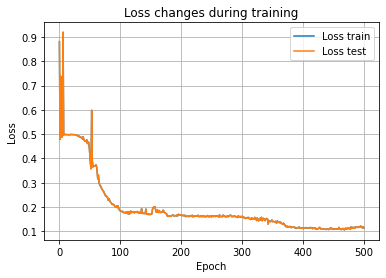

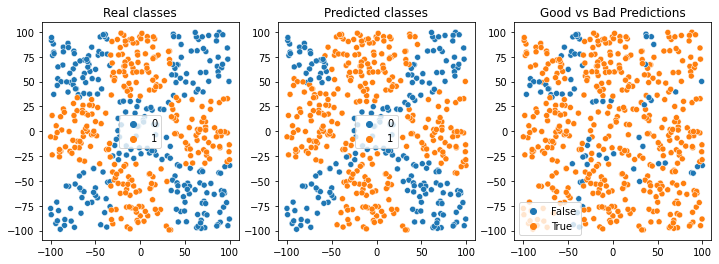

In [61]:
net3_1.plot_training_history()
plot_good_vs_bad_predictions(net3_1, x_test, y_test)

#### Model 2 - with softmax

In [65]:
net3_2 = mlp.NeuralNetwork()
net3_2.add(mlp.Layer(2))
net3_2.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net3_2.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net3_2.add(mlp.Layer(20, activation_fun=mlp.ActivationReLU()))
net3_2.add(mlp.Layer(2, activation_fun=mlp.ActivationSoftmax(), add_bias=False))

In [66]:
net3_2.train(x_train, y_train, x_test, y_test, epochs=500, learning_rate=0.003,\
            batch_size=10, loss_function=mlp.LossCrossEntropy())

c:\Users\matem\PycharmProjects\miowad\MultiLayerPerceptron.py:279: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP/(TP+FP)


Epoch:    1/500,  CrossEntropy loss train:    5.295,  test:    5.295   |   F1 macro train:    0.333,  test:    0.333
Epoch:   51/500,  CrossEntropy loss train:    0.693,  test:    0.693   |   F1 macro train:    0.678,  test:    0.678
Epoch:  101/500,  CrossEntropy loss train:    0.588,  test:    0.588   |   F1 macro train:    0.755,  test:    0.755
Epoch:  151/500,  CrossEntropy loss train:    0.541,  test:    0.541   |   F1 macro train:    0.789,  test:    0.789
Epoch:  201/500,  CrossEntropy loss train:    0.529,  test:    0.529   |   F1 macro train:    0.801,  test:    0.801
Epoch:  251/500,  CrossEntropy loss train:    0.518,  test:    0.518   |   F1 macro train:    0.803,  test:    0.803
Epoch:  301/500,  CrossEntropy loss train:    0.508,  test:    0.508   |   F1 macro train:    0.798,  test:    0.798
Epoch:  351/500,  CrossEntropy loss train:    0.519,  test:    0.519   |   F1 macro train:    0.792,  test:    0.792
Epoch:  401/500,  CrossEntropy loss train:    0.474,  test:    0

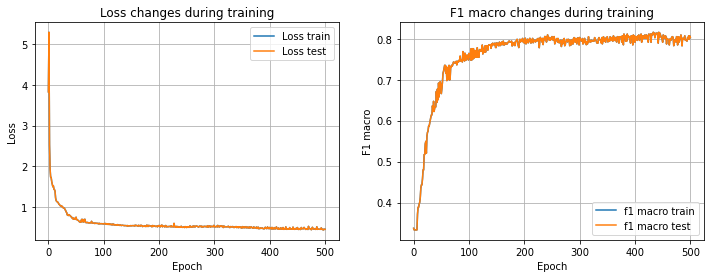

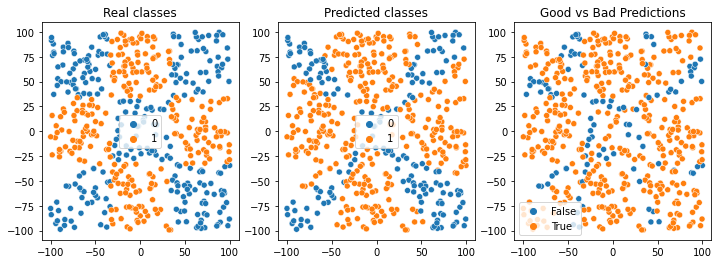

In [67]:
net3_2.plot_training_history()
plot_good_vs_bad_predictions(net3_2, x_test, y_test)

## Summary